### Facebook Prophet 

Team members:<br><br>Kautilya Kondragunta(801231832)<br>
Naimisha Churi (801257788) <br>
Nidhi Srinath (801199302)

The data we have used to ecplore the prophet API is the 'Housing price' dataset <br>
The dataset consists of the prices of the houses on the basis of number of bedrooms in the house and the locality.There is a price quote given for every date in the period which is required by the prophet model for forecasting.<br><br>


<a href="https://www.kaggle.com/htagholdings/property-sales">Data Source</a><br>
Domain: Real Estate

In [1]:
import warnings
warnings.simplefilter('ignore')

In [2]:
import pandas as pd
import numpy as np
from prophet import Prophet
from prophet.plot import add_changepoints_to_plot


Importing plotly failed. Interactive plots will not work.


In [3]:
df = pd.read_csv('./raw_sales.csv')


In [4]:
df.head()

,datesold,postcode,price,propertyType,bedrooms
0,07-02-2007 00:00,2607,525000,house,4
1,27-02-2007 00:00,2906,290000,house,3
2,07-03-2007 00:00,2905,328000,house,3
3,09-03-2007 00:00,2905,380000,house,4
4,21-03-2007 00:00,2906,310000,house,3


In [5]:
df.describe()

,postcode,price,bedrooms
count,29580.000000,2.958000e+04,29580.000000
mean,2730.249730,6.097363e+05,3.250169
std,146.717292,2.817079e+05,0.951275
min,2600.000000,5.650000e+04,0.000000
25%,2607.000000,4.400000e+05,3.000000
50%,2615.000000,5.500000e+05,3.000000
75%,2905.000000,7.050000e+05,4.000000
max,2914.000000,8.000000e+06,5.000000


## Preprocess the timestamp

 - Here we are dropping the timestamps as the recorded time was at the start of each day and we can ignore the timestamp to decrease the redundancy.

In [6]:
df['ds'] = df['datesold'].apply(lambda stamp: stamp[:-6])

In [7]:
df['y'] = df['price']
df

,datesold,postcode,price,propertyType,bedrooms,ds,y
0,07-02-2007 00:00,2607,525000,house,4,07-02-2007,525000
1,27-02-2007 00:00,2906,290000,house,3,27-02-2007,290000
2,07-03-2007 00:00,2905,328000,house,3,07-03-2007,328000
3,09-03-2007 00:00,2905,380000,house,4,09-03-2007,380000
4,21-03-2007 00:00,2906,310000,house,3,21-03-2007,310000
...,...,...,...,...,...,...,...
29575,25-07-2019 00:00,2900,500000,unit,3,25-07-2019,500000
29576,25-07-2019 00:00,2612,560000,unit,2,25-07-2019,560000
29577,26-07-2019 00:00,2912,464950,unit,2,26-07-2019,464950
29578,26-07-2019 00:00,2601,589000,unit,2,26-07-2019,589000


## Find the timeseries trend in the prices for 4 bedroom properties with postcode 2905

- Isolating the price trends for all `4` bedroom housing at location with zip `2905`

In [8]:
df = df[(df['bedrooms'] == 4) & (df['postcode'] == 2905)]

## Drop the unneccessary features

- Dropping all the extra features from the dataframe as prophet requres only the `ds` and the target variable `y` to predict the values.

In [9]:
df1 = df.drop(['datesold', 'postcode', 'price', 'propertyType', 'bedrooms'], axis=1)

df1

,ds,y
3,09-03-2007,380000
5,04-04-2007,465000
42,21-08-2007,455000
69,12-10-2007,447000
75,19-10-2007,455000
...,...,...
26058,22-12-2014,620000
27825,29-07-2017,490000
27968,26-09-2017,400000
28304,05-02-2018,535000


### Holidays

In [21]:
independence = pd.DataFrame({
  'holiday': 'Independence day',
  'ds': pd.to_datetime(['2007-07-04', '2008-07-04', '2009-07-04', '2010-07-04', '2011-07-04', '2012-07-04', '2013-07-04', '2014-07-04', '2015-07-04', '2016-07-04', '2017-07-04', '2018-07-04', '2019-07-04']),
  'lower_window': -1,
  'upper_window': 0,
})
christmas = pd.DataFrame({
  'holiday': 'Christmas',
  'ds': pd.to_datetime(['2007-12-25', '2008-12-25', '2009-12-25', '2010-12-25', '2011-12-25', '2012-12-25','2013-12-25', '2014-12-25', '2015-12-25', '2016-12-25', '2017-12-25', '2018-12-25', '2019-12-25']),
  'lower_window': -1,
  'upper_window': 0,
})

holidays = pd.concat([christmas, independence])
holidays

,holiday,ds,lower_window,upper_window
0,Christmas,2007-12-25,-1,0
1,Christmas,2008-12-25,-1,0
2,Christmas,2009-12-25,-1,0
3,Christmas,2010-12-25,-1,0
4,Christmas,2011-12-25,-1,0
5,Christmas,2012-12-25,-1,0
6,Christmas,2013-12-25,-1,0
7,Christmas,2014-12-25,-1,0
8,Christmas,2015-12-25,-1,0
9,Christmas,2016-12-25,-1,0


### Fit the Prophet model

In [47]:
model = Prophet(daily_seasonality=True, changepoint_range=0.9, changepoint_prior_scale=0.5, holidays=holidays)
model.fit(df1)

In [48]:
df1.tail()

,ds,y
26058,22-12-2014,620000
27825,29-07-2017,490000
27968,26-09-2017,400000
28304,05-02-2018,535000
28424,13-03-2018,645000


- Predicting the future values (1 year) and use a Daily Frequency by setting the `periods` and `freq`attributes of the `make_future_dataframe` function as 365 days

In [49]:
future = model.make_future_dataframe(periods=365, freq='D')
forecast = model.predict(future)
forecast.tail()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,Christmas,Christmas_lower,Christmas_upper,Independence day,...,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
1057,2020-11-27,672983.886806,572673.996671,777029.730150,665802.166798,680426.672005,0.0,0.0,0.0,0.0,...,-500.980479,-500.980479,-500.980479,2888.725698,2888.725698,2888.725698,0.0,0.0,0.0,677464.325899
1058,2020-11-28,672990.006940,595063.822407,800421.014000,665783.539889,680459.869780,0.0,0.0,0.0,0.0,...,17557.338786,17557.338786,17557.338786,855.252715,855.252715,855.252715,0.0,0.0,0.0,693495.292314
1059,2020-11-29,672996.127075,581626.461832,780040.048813,665761.479181,680493.067555,0.0,0.0,0.0,0.0,...,6659.035567,6659.035567,6659.035567,-1344.929458,-1344.929458,-1344.929458,0.0,0.0,0.0,680402.927057
1060,2020-11-30,673002.247209,562767.190627,759819.810203,665747.605588,680526.265329,0.0,0.0,0.0,0.0,...,-10280.352991,-10280.352991,-10280.352991,-3652.785148,-3652.785148,-3652.785148,0.0,0.0,0.0,661161.802943
1061,2020-12-01,673008.367343,567003.181047,768115.838625,665734.195355,680577.463207,0.0,0.0,0.0,0.0,...,325.597769,325.597769,325.597769,-6006.154652,-6006.154652,-6006.154652,0.0,0.0,0.0,669420.504333


In [50]:
forecast[['ds', 'yhat', 'yhat_upper', 'yhat_lower']].tail()

,ds,yhat,yhat_upper,yhat_lower
1057,2020-11-27,677464.325899,777029.730150,572673.996671
1058,2020-11-28,693495.292314,800421.014000,595063.822407
1059,2020-11-29,680402.927057,780040.048813,581626.461832
1060,2020-11-30,661161.802943,759819.810203,562767.190627
1061,2020-12-01,669420.504333,768115.838625,567003.181047


In [51]:
forecast[['ds', 'yhat', 'yhat_upper', 'yhat_lower']].describe()

,yhat,yhat_upper,yhat_lower
count,1062.000000,1062.000000,1062.000000
mean,609786.071459,711180.270345,507998.991963
std,66079.599857,66321.026416,66023.349740
min,438321.516852,541013.726450,335187.736886
25%,551620.352535,652765.451416,449978.907065
50%,620721.831410,721582.165998,517578.093141
75%,667561.424547,768615.707816,565900.243962
max,802052.661374,909867.203289,702900.494445


- Plotting the forecasted prices along with the upper and lower `yhat` bounds.
- Adding the change points to the plot which automatically detects points where there is a significant change in the trend of the predicted value

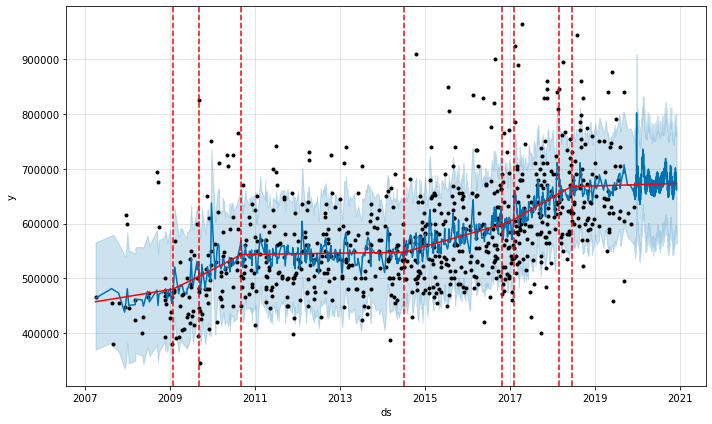

In [52]:
plot1 = model.plot(forecast)
a=add_changepoints_to_plot(plot1.gca(), model, forecast)

- From the above plot we can see a gradual increase in the prices of the houses in the past few decades <br>
- We can see from the historical data that the housing prices haven't changed from 2011 to 2015 which could have been due to the recession.

- Plotting the trends - yearly, weekly using the `plot_components` function of the prophet model.

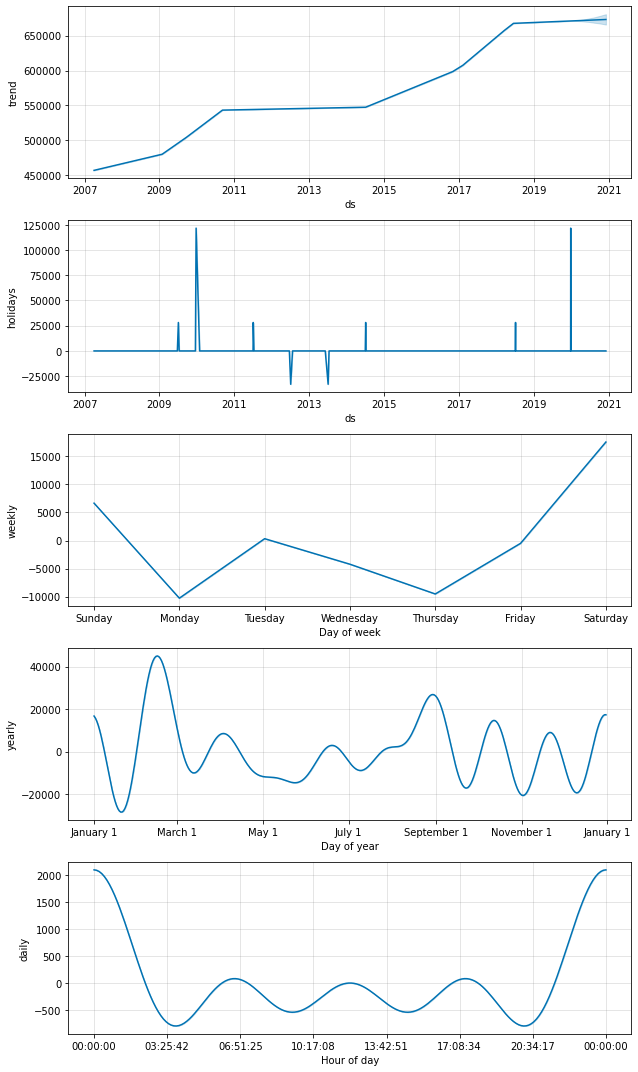

In [53]:
plot2 = model.plot_components(forecast)

- The weekly plot shows that the housing prices have spiked during the weekends and have been the lowest on Mondays.
- The yearly plot shows that the prices have bottomed out during january and have seen a spike in the valuation the following months. During the time period between May and August the house prices are fairly constant in contrast to the rest of the year where they are signifcantly fluctuating.